In [1]:
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk
from scipy import stats
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\Mano\Desktop\credit_card.csv')

In [3]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
data.CREDIT_LIMIT.fillna(data.CREDIT_LIMIT.mean(),inplace=True )

In [6]:
data.MINIMUM_PAYMENTS .fillna(data.MINIMUM_PAYMENTS .mean(),inplace=True )

In [7]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
data.drop(["CUST_ID"],axis=1,inplace=True)

In [10]:
z = np.abs(stats.zscore(data))

In [11]:
data[data > 150] *= 10

In [12]:
data = data[(z < 3).all(axis=1)]

In [13]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)


In [14]:
iqr=Q3-Q1

In [15]:
pca = PCA(n_components=2)
pca.fit(data)


PCA(n_components=2)

In [16]:
PCA(n_components=2)

PCA(n_components=2)

In [17]:
 print(pca.explained_variance_ratio_)

[0.56962988 0.16047559]


In [18]:
transformed = pca.transform(data)

In [19]:
steps = [('pca', PCA()), ('m', LogisticRegression())]
model = Pipeline(steps=steps)

In [20]:
steps = [('norm', MinMaxScaler()), ('pca', PCA()), ('m', LogisticRegression())]
model = Pipeline(steps=steps)

In [21]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)

In [22]:
print(X.shape, y.shape)

(1000, 20) (1000,)


In [23]:
steps = [('pca', PCA(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)

In [24]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [25]:
from numpy import mean
from numpy import std

In [26]:
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.816 (0.034)


In [27]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [28]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)

In [29]:
kmeans.labels_

array([0, 1, 1, ..., 0, 0, 0])

In [30]:
 kmeans.predict(data)

array([0, 1, 1, ..., 0, 0, 0])

In [31]:
kmeans.cluster_centers_

array([[8.11874113e+03, 8.74830201e-01, 5.39559444e+03, 2.69888597e+03,
        2.62373046e+03, 4.44865500e+03, 4.59788834e-01, 1.41567770e-01,
        3.51655137e-01, 9.75860364e-02, 1.97515163e+00, 1.00361964e+01,
        2.34178189e+04, 9.50645263e+03, 4.71468976e+03, 1.51674786e-01,
        1.17006457e+01],
       [2.23641575e+04, 9.22243653e-01, 1.19358046e+04, 7.60961953e+03,
        4.24297684e+03, 1.15808546e+04, 5.42855476e-01, 3.04060059e-01,
        3.70344114e-01, 1.36280678e-01, 3.06112785e+00, 1.65058115e+01,
        7.64676750e+04, 2.04782163e+04, 7.91581472e+03, 1.60939386e-01,
        1.18609557e+01]])

In [32]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    kmeanModel=KMeans(n_clusters=k).fit(data)
    kmeanModel.fit(data)

    distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / data.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(data, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / data.shape[0]
    mapping2[k] = kmeanModel.inertia_


In [33]:
for key, val in mapping1.items():
    print(f'{key} : {val}')


1 : 36506.78208263885
2 : 27570.45334551628
3 : 25384.705140552138
4 : 23743.479779468453
5 : 22555.600021004197
6 : 21388.07822339007
7 : 20650.123282895012
8 : 19715.703203461697
9 : 19102.78999279541


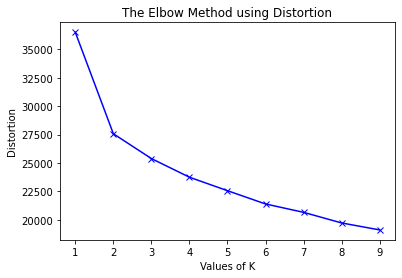

In [34]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


# exam 2

In [43]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [46]:
tw=pd.read_csv(r"C:\Users\Mano\Desktop\Sentiment.csv")

In [47]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [51]:
tw

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0000,yes,1.0000,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0000,yes,1.0000,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0000,yes,1.0000,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13866,13867,No candidate mentioned,1.0000,yes,1.0000,Negative,0.7991,Abortion,0.6014,No candidate mentioned,...,yes,7,Negative,Abortion\nWomen's Issues (not abortion though),RT @cappy_yarbrough: Love to see men who will ...,NaN,2015-08-07 09:29:43 -0700,629690895479250944,Como,NaN
13867,13868,Mike Huckabee,0.9611,yes,1.0000,Positive,0.7302,None of the above,0.9229,Mike Huckabee,...,yes,1,NaN,NaN,RT @georgehenryw: Who thought Huckabee exceede...,NaN,2015-08-07 09:25:02 -0700,629689719056568320,USA,NaN
13868,13869,Ted Cruz,1.0000,yes,1.0000,Positive,0.8051,None of the above,0.9647,Ted Cruz,...,yes,67,Positive\nNeutral,NaN,"RT @Lrihendry: #TedCruz As President, I will a...",NaN,2015-08-07 07:19:18 -0700,629658075784282112,NaN,NaN
13869,13870,Donald Trump,1.0000,yes,1.0000,Negative,1.0000,Women's Issues (not abortion though),0.9202,Donald Trump,...,yes,149,NaN,Women's Issues (not abortion though),RT @JRehling: #GOPDebate Donald Trump says tha...,NaN,2015-08-07 09:54:04 -0700,629697023663546368,NaN,NaN


In [52]:
tw['tidy_tweet'] = np.vectorize(remove_pattern)(tw['text'], "@[\w]*")
 

In [53]:
tw['tidy_tweet'] = tw['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

C:\Users\Mano\AppData\Local\Temp/ipykernel_13104/522359893.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tw['tidy_tweet'] = tw['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")


In [54]:
tw['tidy_tweet'] = tw['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [55]:
tokenized_tweet = tw['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [everyone, feel, about, Climate, Change, quest...
1    [Didn, catch, full, #GOPdebate, last, night, H...
2    [mention, Tamir, Rice, #GOPDebate, held, Cleve...
3    [That, Carly, Fiorina, trending, hours, after,...
4    [#GOPDebate, delivered, highest, ratings, hist...
Name: tidy_tweet, dtype: object

In [56]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_tweet.head()

0    [everyon, feel, about, climat, chang, question...
1    [didn, catch, full, #gopdeb, last, night, here...
2     [mention, tamir, rice, #gopdeb, held, cleveland]
3    [that, carli, fiorina, trend, hour, after, deb...
4    [#gopdeb, deliv, highest, rate, histori, presi...
Name: tidy_tweet, dtype: object

In [59]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

tw['tidy_tweet'] = tokenized_tweet

In [63]:
tw['sentiment'] = tw['sentiment'].apply(lambda rating : +1 if rating > 3 else -1)

TypeError: '>' not supported between instances of 'str' and 'int'